In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/loan-prediction-based-on-customer-behavior/Test Data.csv
/kaggle/input/loan-prediction-based-on-customer-behavior/Training Data.csv
/kaggle/input/loan-prediction-based-on-customer-behavior/Sample Prediction Dataset.csv


# Import Section

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("fivethirtyeight")

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

# Loading Data

In [3]:
data = pd.read_csv("/kaggle/input/loan-prediction-based-on-customer-behavior/Training Data.csv")
data.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 25.0+ MB


In [5]:
data.isnull().sum()

Id                   0
Income               0
Age                  0
Experience           0
Married/Single       0
House_Ownership      0
Car_Ownership        0
Profession           0
CITY                 0
STATE                0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
Risk_Flag            0
dtype: int64

#### no null values in any features good data set

In [6]:
data.describe()

,Id,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
count,252000.000000,2.520000e+05,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000
mean,126000.500000,4.997117e+06,49.954071,10.084437,6.333877,11.997794,0.123000
std,72746.278255,2.878311e+06,17.063855,6.002590,3.647053,1.399037,0.328438
min,1.000000,1.031000e+04,21.000000,0.000000,0.000000,10.000000,0.000000
25%,63000.750000,2.503015e+06,35.000000,5.000000,3.000000,11.000000,0.000000
50%,126000.500000,5.000694e+06,50.000000,10.000000,6.000000,12.000000,0.000000
75%,189000.250000,7.477502e+06,65.000000,15.000000,9.000000,13.000000,0.000000
max,252000.000000,9.999938e+06,79.000000,20.000000,14.000000,14.000000,1.000000


# Exploratory Data Analysis

## How many have defaulted on loan(Risk_flag=1) and how many paid??

In [7]:
defaulted = data.Risk_Flag.sum() # len(data.Risk_Flag[data.Risk_Flag == 1])
total = len(data.Risk_Flag)
rate_of_default = defaulted / total
print(f"The rate of 'defaulted-on-loan' is {rate_of_default * 100 }% and total number of defaulter are", defaulted)

The rate of 'defaulted-on-loan' is 12.3% and total number of defaulter are 30996


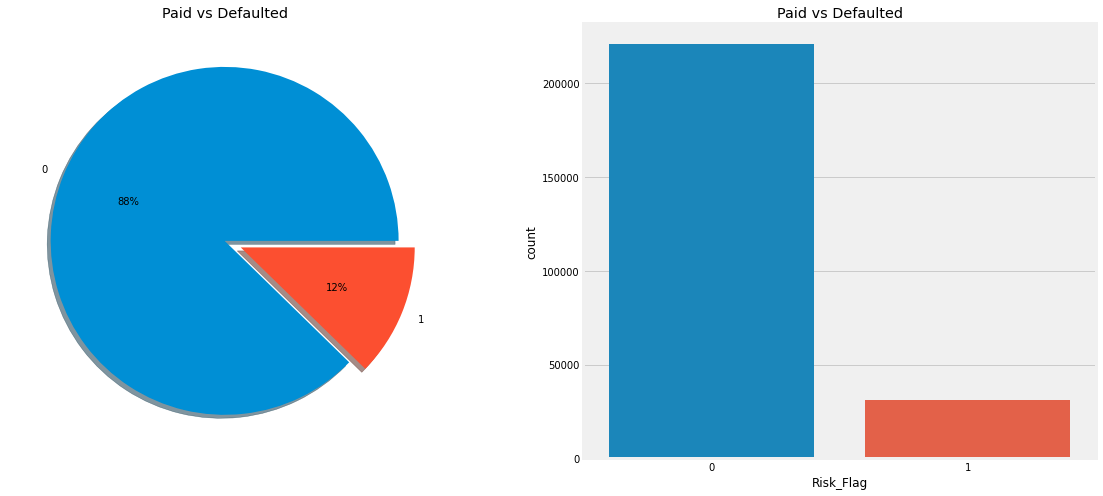

In [8]:
f, ax = plt.subplots(1,2, figsize=(18,8))
data.Risk_Flag.value_counts().plot.pie(explode=[0,0.1], autopct= "%1.f%%", shadow = True, ax=ax[0])
ax[0].set_title("Paid vs Defaulted")
ax[0].set_ylabel("")
sns.countplot("Risk_Flag", data=data, ax=ax[1])
ax[1].set_title("Paid vs Defaulted")
plt.show()

__*Here we can see that about 12% have defaulted-on-loan.*__

## Marital_status *(Married/Single) -> Categorical value*

In [9]:
data.rename(columns = {"Married/Single" : "Marital_status"},inplace=True)

In [10]:
data.Marital_status.value_counts()

single     226272
married     25728
Name: Marital_status, dtype: int64

In [11]:
pd.crosstab(data.Marital_status, data.Risk_Flag, margins=True).style.background_gradient(cmap="Blues")

Risk_Flag,0,1,All
Marital_status,,,
married,23092,2636,25728
single,197912,28360,226272
All,221004,30996,252000


In [12]:
married_default_rate = 2636 / 25728 
single_default_rate = 28360 / 226272
print(f"default-on-loan for married is {round(married_default_rate * 100)} %\n"
      f"default-on-loan for single is {round(single_default_rate * 100)}%")

default-on-loan for married is 10 %
default-on-loan for single is 13%


[Text(0.5, 1.0, 'Paid and Default based on Marital status')]

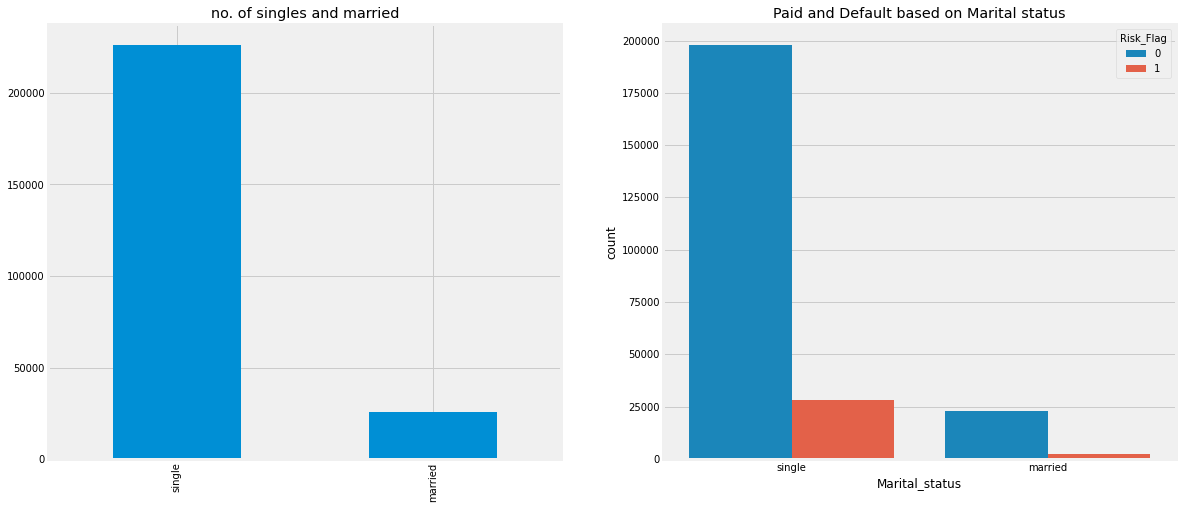

In [13]:
f, ax = plt.subplots(1,2,figsize=(18,8))
data.Marital_status.value_counts().plot.bar(ax=ax[0]).set(title = "no. of singles and married")
sns.countplot(data.Marital_status, hue=data.Risk_Flag, ax=ax[1]).set(title="Paid and Default based on Marital status")

__Observation__: based on above calculation and figures we can say that __singles__ have more Risk Flags then __married__ when compared and there are more __singles__ that wants loan then __married__.
                 

## Profession -> *Categorical variable* 

In [14]:
print(f"The number of profession in dataset is {len(data.Profession.value_counts())}")

The number of profession in dataset is 51


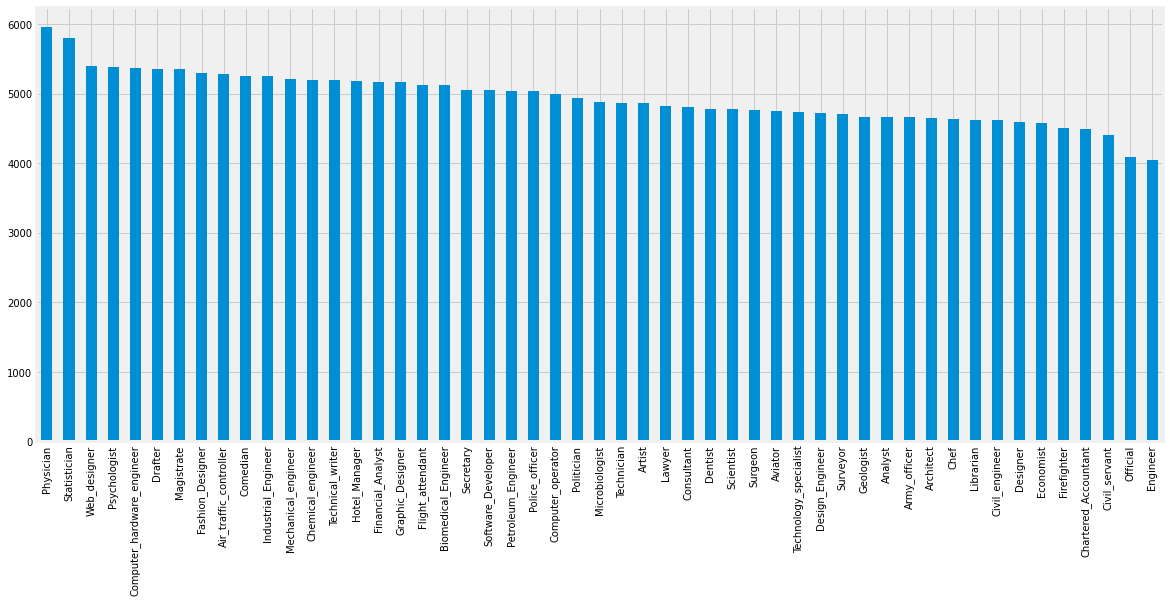

Risk_Flag,0,1,All
Profession,,,
All,221004,30996,252000
Police_officer,4209,826,5035
Software_Developer,4303,750,5053
Air_traffic_controller,4566,715,5281
Surveyor,4000,714,4714


In [15]:
plt.subplots(figsize=(18,8))
data.Profession.value_counts().plot.bar()
plt.show()

pd.crosstab(data.Profession, data.Risk_Flag, margins=True).sort_values(by=1, ascending=False).head()

__Observation__:
from above we found that there are total __51__ number of __profession__, and __Physicians__ seems to be the Profession that takes most loans and __Police_officer__ default-on-loan most 0_0. 

## House Ownership -> *Categorical Variable*

In [16]:
data.House_Ownership.value_counts()

rented          231898
owned            12918
norent_noown      7184
Name: House_Ownership, dtype: int64

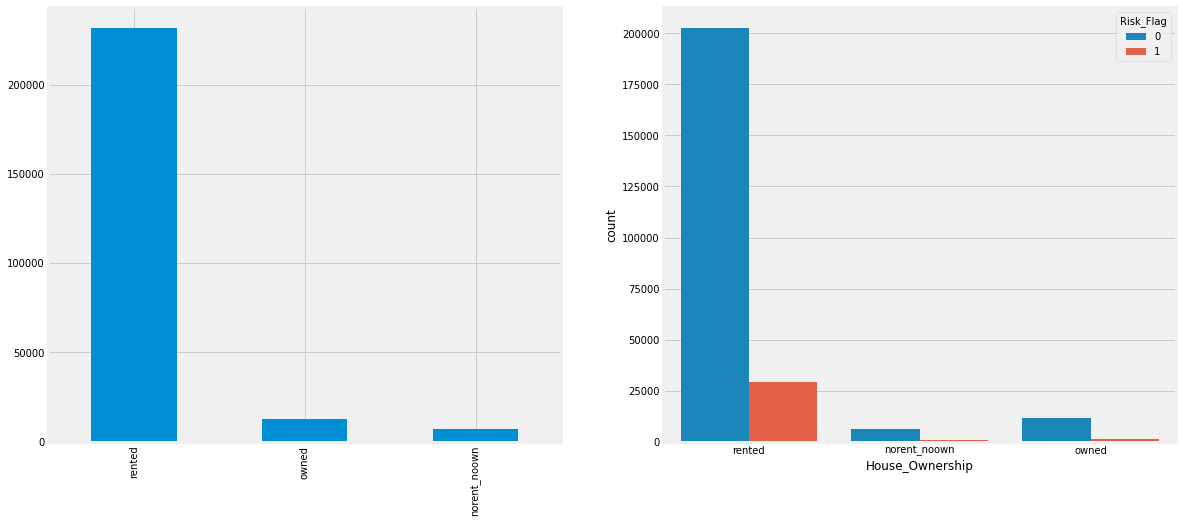

In [17]:
f, ax = plt.subplots(1,2,figsize=(18,8))
data["House_Ownership"].value_counts().plot.bar(ax=ax[0])
sns.countplot(data.House_Ownership, hue=data.Risk_Flag, ax=ax[1])
plt.show()

__Observation__: \
People who __Rented__ are the highest loan takers and highest defaulters.

## Car Ownership -> *Categorical value*

In [18]:
data.Car_Ownership.value_counts()

no     176000
yes     76000
Name: Car_Ownership, dtype: int64

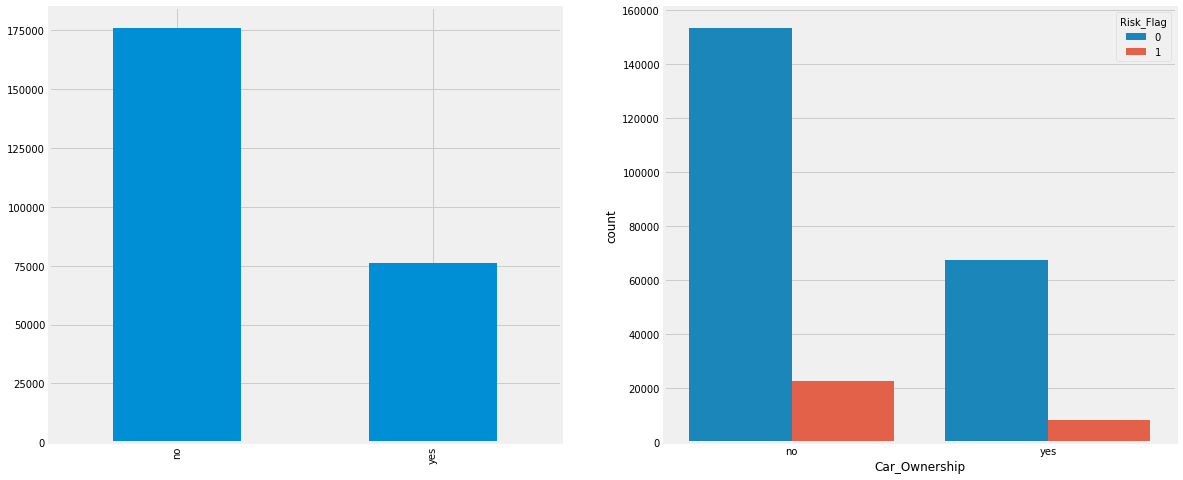

In [19]:
f, ax = plt.subplots(1,2,figsize=(18,8))
data["Car_Ownership"].value_counts().plot.bar(ax=ax[0])
sns.countplot(data.Car_Ownership, hue=data.Risk_Flag, ax=ax[1])
plt.show()

In [20]:
pd.crosstab(data.Car_Ownership, data.Risk_Flag, margins=True)

Risk_Flag,0,1,All
Car_Ownership,,,
no,153439,22561,176000
yes,67565,8435,76000
All,221004,30996,252000


In [21]:
print("defaulters with car:",round((8435/76000) * 100),"%")
print("defaulters with no car:",round((22561/176000) * 100),"%") 

defaulters with car: 11 %
defaulters with no car: 13 %


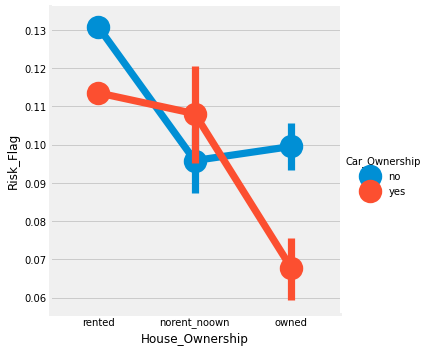

In [22]:
sns.factorplot('House_Ownership','Risk_Flag',hue='Car_Ownership',data=data)
plt.show()

__Observation__: \
__People with no car(13%)__ tend to default-on-loan __more__ than __people with car(11%)__.\
From factor plot we can see that people with __house ownership__ as well as __car ownership__ default-on-loan __less__ then other category.

## State (and city) -> *Categorical Variable*

In [23]:
data.STATE.value_counts().shape, data.CITY.value_counts().shape

((29,), (317,))

so, there are 317 cities and 29 states in dataset.

In [24]:
pd.crosstab(data.STATE, data.CITY, margins=True)

CITY,Adoni,Agartala,Agra,Ahmedabad,Ahmednagar,Aizawl,Ajmer,Akola,Alappuzha,Aligarh,...,Vadodara,Varanasi,Vasai-Virar,Vellore,Vijayanagaram,Vijayawada,Visakhapatnam[4],Warangal[11][12],Yamunanagar,All
STATE,,,,,,,,,,,,,,,,,,,,,
Andhra_Pradesh,953,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1259,1172,971,0,0,25297
Assam,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7062
Bihar,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,19780
Chandigarh,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,656
Chhattisgarh,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3834
Delhi,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5490
Gujarat,0,0,0,649,0,0,0,0,0,0,...,960,0,0,0,0,0,0,0,0,11408
Haryana,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,659,7890
Himachal_Pradesh,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,833


so, basically cities are subset of states, and there are almost 317 cities we only explore State for visual representation.


In [25]:
pd.crosstab(data.STATE, data.Risk_Flag, margins=True).style.background_gradient(cmap="summer_r")

Risk_Flag,0,1,All
STATE,,,
Andhra_Pradesh,22362,2935,25297
Assam,6132,930,7062
Bihar,17197,2583,19780
Chandigarh,595,61,656
Chhattisgarh,3323,511,3834
Delhi,4916,574,5490
Gujarat,10065,1343,11408
Haryana,6910,980,7890
Himachal_Pradesh,722,111,833


In [26]:
(pd.crosstab(data.STATE, data.Risk_Flag, margins=True)[1] / pd.crosstab(data.STATE, data.Risk_Flag, margins=True)["All"]).sort_values(ascending=False).head()

STATE
Manipur              0.215548
Tripura              0.168109
Kerala               0.167097
Jammu_and_Kashmir    0.158989
Madhya_Pradesh       0.154369
dtype: float64

From here we can see that __Manipur__ has 21% of default rate

In [27]:
(pd.crosstab(data.CITY, data.Risk_Flag, margins=True)[1] / pd.crosstab(data.CITY, data.Risk_Flag, margins=True)["All"]).sort_values(ascending=False).head()

CITY
Bhubaneswar    0.326194
Gwalior        0.272727
Bettiah[33]    0.266958
Kochi          0.252862
Raiganj        0.239554
dtype: float64

In [28]:
data.STATE[data.CITY == "Bhubaneswar"].value_counts()

Odisha    607
Name: STATE, dtype: int64

Interesting thing is __Bhubaneswar__ is city that have 32% of default rate, while __Odisha__ is state that __Bhubaneswar__ is in but only have 14% of default rate.

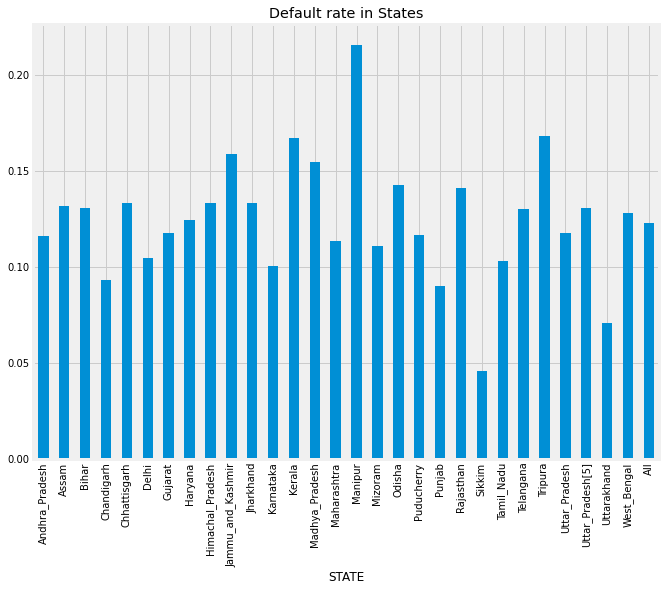

In [29]:
(pd.crosstab(data.STATE, data.Risk_Flag, margins=True)[1] / pd.crosstab(data.STATE, data.Risk_Flag, margins=True)["All"]).plot.bar().set(title="Default rate in States")
fig = plt.gcf()
fig.set_size_inches(10,8)
plt.show()

__Observation:__ 
1) Overall Manipur is the place with Highest default rate(21%) \
2) Bhubaneshwar is city with default rate of 32% while odisha has only 14% default rate \
3) Cities are subset of States 

## Income -> *Continuous Value*

In [30]:
print('Highest Income is:',data.Income.max())
print('Lowest Income is:',data.Income.min())
print('Average Income is:',data.Income.mean())

Highest Income is: 9999938
Lowest Income is: 10310
Average Income is: 4997116.665325397


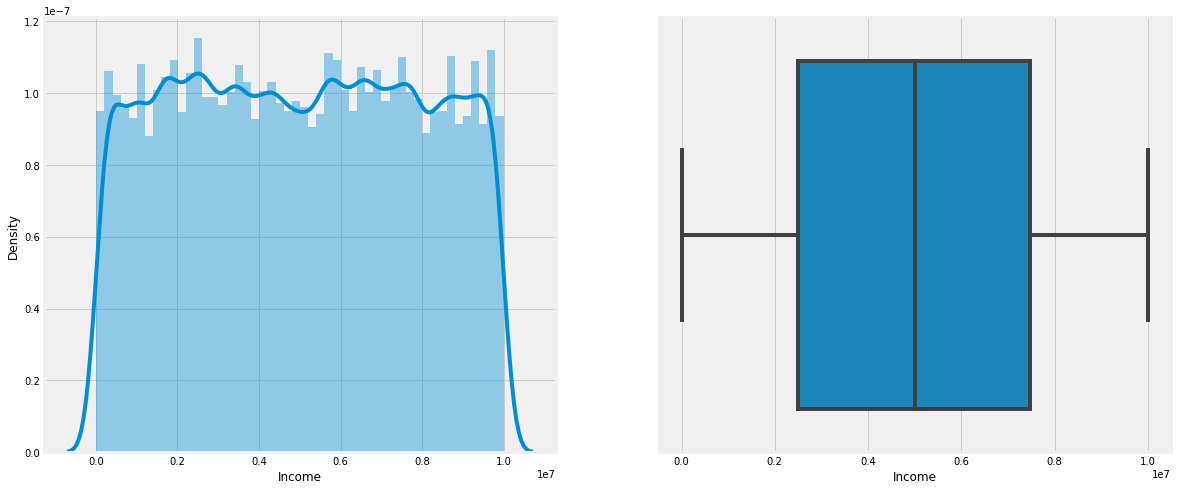

In [31]:
f , ax = plt.subplots(1,2,figsize=(18,8))
sns.distplot(data.Income, ax=ax[0]);
sns.boxplot(data.Income, ax=ax[1]);

__Observation__ \
__Income__ is normal as there is no outlier in boxplot

## AGE -> *Continuous Value*

In [32]:
print('Highest age is:',data.Age.max())
print('Lowest age is:',data.Age.min())
print('Average age is:',data.Age.mean())

Highest age is: 79
Lowest age is: 21
Average age is: 49.95407142857143


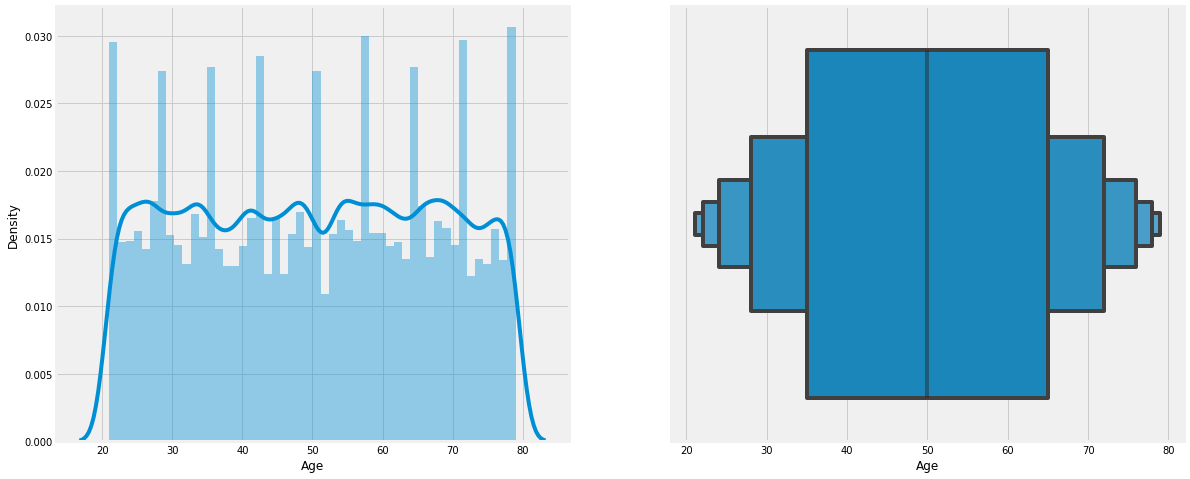

In [33]:
f, ax = plt.subplots(1,2, figsize=(18,8))
sns.distplot(data.Age, ax=ax[0]);
sns.boxenplot(data.Age, ax=ax[1]);

__Observaton__ \
Highest age is 79 years old while youngest is 21 and average is 49 years old.And from box plot we can see that from 35 to 65 the density is more i.e. 35-65 takes most loan.

## Experience -> *Continuous Value*

In [34]:
pd.crosstab(data.Risk_Flag, data.Experience, margins=True)

Experience,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,All
Risk_Flag,,,,,,,,,,,,,,,,,,,,,
0,9461,9773,9197,10483,10358,10876,11601,9829,10016,11477,...,11404,10282,11157,10185,10506,10726,11572,10982,10066,221004
1,1582,1802,1890,1586,1449,1565,1557,1403,1334,1459,...,1396,1431,1212,1808,1600,1405,1029,1305,1284,30996
All,11043,11575,11087,12069,11807,12441,13158,11232,11350,12936,...,12800,11713,12369,11993,12106,12131,12601,12287,11350,252000


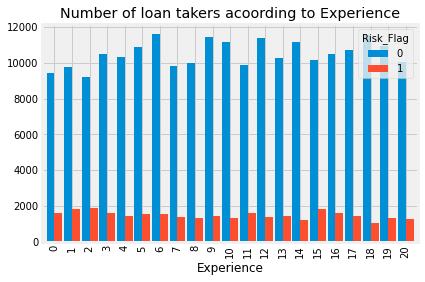

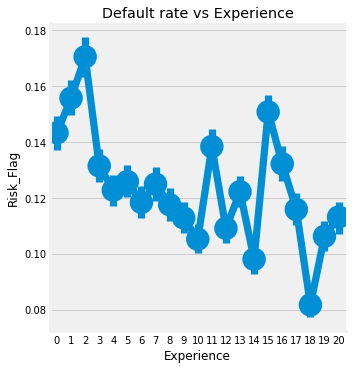

In [35]:
pd.crosstab(data.Experience, data.Risk_Flag).plot.bar(width=0.9).set(title="Number of loan takers acoording to Experience");
sns.factorplot("Experience", "Risk_Flag", data=data).set(title="Default rate vs Experience");

__Observation__ \
__Default rate__ is higher in people with less __Experience__ compared to higher ones.

## Current Job Years -> *Continious Value*

In [36]:
pd.crosstab(data.Risk_Flag ,data.CURRENT_JOB_YRS)

CURRENT_JOB_YRS,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
Risk_Flag,,,,,,,,,,,,,,,
0,9461,9773,9197,26049,25132,22119,20621,17580,16693,15282,13888,11793,9489,7828,6099
1,1582,1802,1890,3411,3207,2972,2870,2345,2181,1850,1880,1802,1116,1271,817


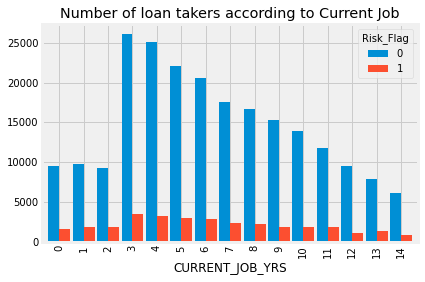

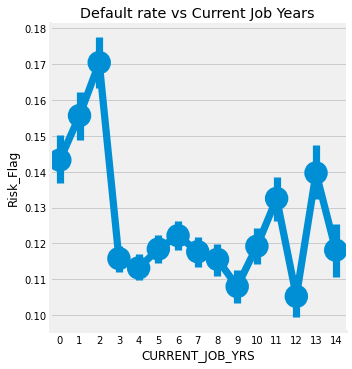

In [37]:
pd.crosstab(data.CURRENT_JOB_YRS ,data.Risk_Flag ).plot.bar(width=0.9).set(title="Number of loan takers according to Current Job")
sns.factorplot("CURRENT_JOB_YRS", "Risk_Flag", data=data).set(title="Default rate vs Current Job Years");

## Current House Years -> Continious Value

In [38]:
pd.crosstab(data.Risk_Flag ,data.CURRENT_HOUSE_YRS)

CURRENT_HOUSE_YRS,10,11,12,13,14
Risk_Flag,,,,,
0,42592,45390,45487,44477,43058
1,6082,6483,6304,6182,5945


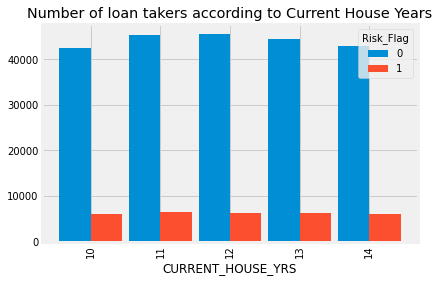

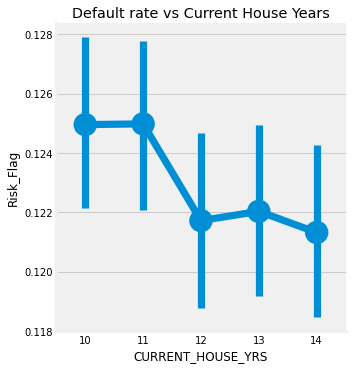

In [39]:
pd.crosstab(data.CURRENT_HOUSE_YRS ,data.Risk_Flag ).plot.bar(width=0.9).set(title="Number of loan takers according to Current House Years")
sns.factorplot("CURRENT_HOUSE_YRS", "Risk_Flag", data=data).set(title="Default rate vs Current House Years");

__Observation__ \
People who lives in same residence for 10 years or more are given loan, and __default rate decreases__ as __Current House Years increases__.

## Correlation Between The Features

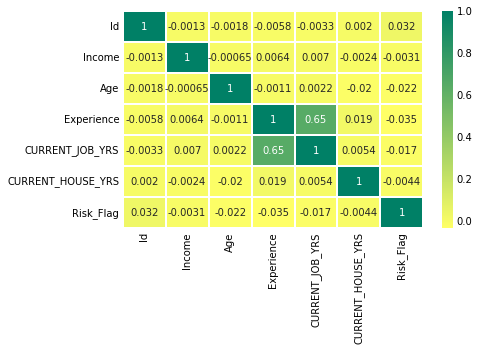

In [40]:
sns.heatmap(data.corr(), annot=True, cmap="summer_r", linewidths=0.2);

## Feature Engineering

### Age_band from age

In [41]:
data["Age_band"] = 0
data.loc[(data["Age"] >= 21) & (data["Age"] <= 33), "Age_band"] = 0
data.loc[(data["Age"] > 33) & (data["Age"] <= 45), "Age_band"] = 1
data.loc[(data["Age"] > 45) & (data["Age"] <= 57), "Age_band"] = 2
data.loc[(data["Age"] > 57) & (data["Age"] <= 69), "Age_band"] = 3
data.loc[(data["Age"] > 69) & (data["Age"] <= 79), "Age_band"] = 4

In [42]:
data["Age_band"].value_counts().to_frame().style.background_gradient(cmap='summer')

,Age_band
0,56669
3,52435
2,51074
1,50075
4,41747


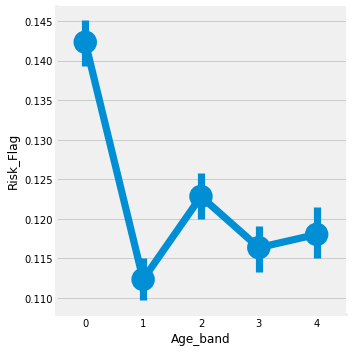

In [43]:
sns.factorplot('Age_band','Risk_Flag', data=data);

__Observation__ \
It is seen from facrot plot that young people form age __21 to 33__ are most risky group to give loan too and as the __age increases the risk decrease__.

### Income_range from Income

Since fare is also a continous feature, we need to convert it into ordinal value. For this we will use pandas.qcut.

So what qcut does is it splits or arranges the values according the number of bins we have passed. So if we pass for 5 bins, it will arrange the values equally spaced into 5 seperate bins or value ranges.

In [44]:
data["Income_range"] = pd.qcut(data["Income"],4)
data.groupby(["Income_range"])["Risk_Flag"].mean().to_frame()


,Risk_Flag
Income_range,
"(10309.999, 2503015.0]",0.127919
"(2503015.0, 5000694.5]",0.119256
"(5000694.5, 7477502.0]",0.118485
"(7477502.0, 9999938.0]",0.126342


In [45]:
data['Income_cat'] = 0
data.loc[(data["Income"] >= 103010)&(data["Income"] <= 2503015), "Income_cat"]=0
data.loc[(data["Income"] > 2503015)&(data["Income"] <= 5000694.5), "Income_cat"]=1
data.loc[(data["Income"] > 5000694.5)&(data["Income"] <= 7477502), "Income_cat"]=2
data.loc[(data["Income"] > 7477502)&(data["Income"] <= 9999938), "Income_cat"]=3

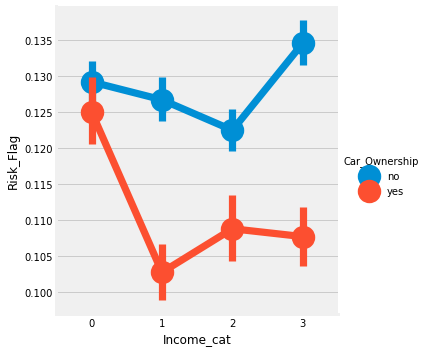

In [46]:
sns.factorplot("Income_cat", "Risk_Flag", data=data, hue="Car_Ownership");

__Observaton__ \
people in __"0" Income category__ default most even if they have __car ownership or not__ and interesting thing is that __people with high salary cap__ but with __no Car ownership__ default most. They are scammers 0_0.

### Current job years & Experience

so, there is multicolinearity between Current job years & Experience so, we remove one, and i think current job years is more important than experience to get a loan.

### Droping Features


In [47]:
data.drop(["Id", "Income", "Income_range", "Age", "Experience"], axis=1, inplace=True)

### Changing categorical variable into numbers

In [48]:
# Importing Label Encoder
from sklearn.preprocessing import LabelEncoder

features = ["Marital_status", "House_Ownership", "Car_Ownership", "Profession",
           "CITY", "STATE"]
label_encoder = LabelEncoder()

for col in features:
    data[col] = label_encoder.fit_transform(data[col])    

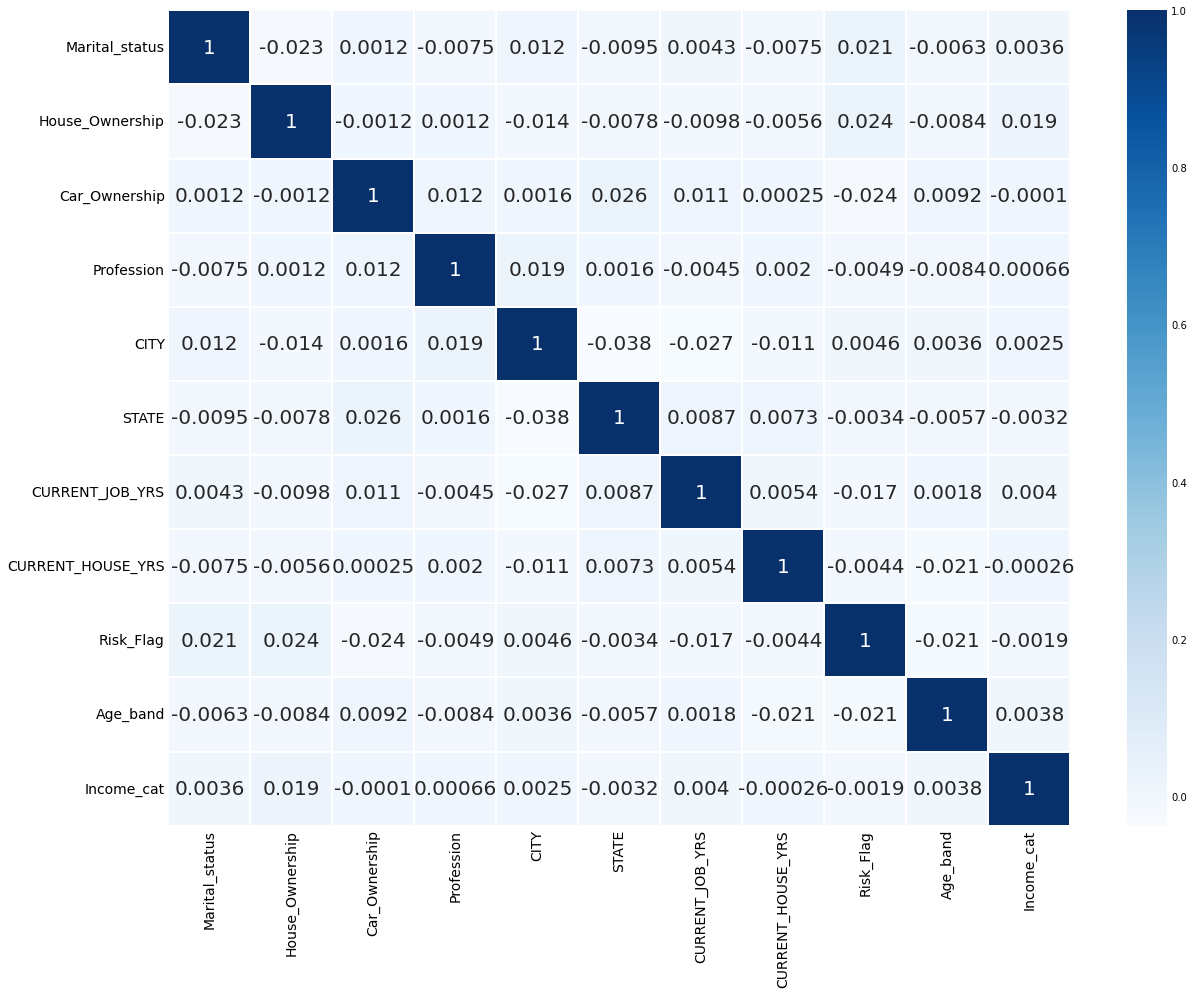

In [49]:
sns.heatmap(data.corr(), annot=True, linewidth=0.2, annot_kws={"size":20}, cmap="Blues")
fig = plt.gcf()
fig.set_size_inches(18,15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()


In [50]:
data.columns

Index(['Marital_status', 'House_Ownership', 'Car_Ownership', 'Profession',
       'CITY', 'STATE', 'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS', 'Risk_Flag',
       'Age_band', 'Income_cat'],
      dtype='object')

## Predictive modeling

In [51]:
# import train test split
from sklearn.model_selection import train_test_split
# imports
from sklearn.model_selection import KFold # for k-fold cross validation
from sklearn.model_selection import cross_val_score # score evaluation
from sklearn.model_selection import cross_val_predict # prediction

X = data.drop(["Risk_Flag"], axis=1)
Y = pd.DataFrame(data.Risk_Flag)

train_X, test_X, train_y, test_y = train_test_split(X, Y, test_size=0.3, random_state=42, stratify=data.Risk_Flag)

## Binary Classification and Cross Validation
## Logistic Regression

In [52]:
# importing logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report

model = LogisticRegression()
model.fit(train_X, train_y)
prediction1 = model.predict(test_X)
print("Accuracy of logistic regression is", metrics.accuracy_score(prediction1, test_y))
result1 = cross_val_score(model, X, Y, cv=10, scoring="accuracy")
print("Accuracy of cross validation is", result1.mean())

Accuracy of logistic regression is 0.8769973544973545
Accuracy of cross validation is 0.877


In [53]:
print(classification_report(test_y, prediction1))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93     66301
           1       0.00      0.00      0.00      9299

    accuracy                           0.88     75600
   macro avg       0.44      0.50      0.47     75600
weighted avg       0.77      0.88      0.82     75600



## KNN

In [54]:
# importing KNN 
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()
model.fit(train_X, train_y)
prediction2 = model.predict(test_X)
print("Accuracy of KNN is", metrics.accuracy_score(prediction2, test_y))
result2 = cross_val_score(model, X, Y, cv=10, scoring="accuracy")
print("Accuracy of cross validation is", result2.mean())

Accuracy of KNN is 0.8887301587301587
Accuracy of cross validation is 0.8879523809523808


In [55]:
print(classification_report(test_y, prediction2))

              precision    recall  f1-score   support

           0       0.93      0.94      0.94     66301
           1       0.55      0.51      0.53      9299

    accuracy                           0.89     75600
   macro avg       0.74      0.72      0.73     75600
weighted avg       0.88      0.89      0.89     75600



## Random Forest Classifier

In [56]:
#import 
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=4, n_estimators = 50)
model.fit(train_X, train_y)
prediction3 = model.predict(test_X)
print("Accuracy of RandomForest is", metrics.accuracy_score(prediction3, test_y))
result3 = cross_val_score(model, X, Y, cv=10, scoring="accuracy")
print("Accuracy of cross validation is", result3.mean())

Accuracy of RandomForest is 0.8992063492063492
Accuracy of cross validation is 0.8999484126984127


In [57]:
print(classification_report(test_y, prediction3))

              precision    recall  f1-score   support

           0       0.94      0.95      0.94     66301
           1       0.60      0.54      0.57      9299

    accuracy                           0.90     75600
   macro avg       0.77      0.75      0.76     75600
weighted avg       0.90      0.90      0.90     75600



## Decision Tree

In [58]:
#import
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=420)
model.fit(train_X, train_y)
prediction4 = model.predict(test_X)
print("Accuracy of DecisionTree is", metrics.accuracy_score(prediction4, test_y))
result4 = cross_val_score(model, X, Y, cv=10, scoring="accuracy")
print("Accuracy of cross validation is", result4.mean())

Accuracy of DecisionTree is 0.8812698412698413
Accuracy of cross validation is 0.8764246031746031


In [59]:
print(classification_report(test_y, prediction4))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93     66301
           1       0.52      0.58      0.54      9299

    accuracy                           0.88     75600
   macro avg       0.73      0.75      0.74     75600
weighted avg       0.89      0.88      0.88     75600



## Confusion Matrix

[Text(0.5, 1.0, 'RandomForest confusion matrix')]

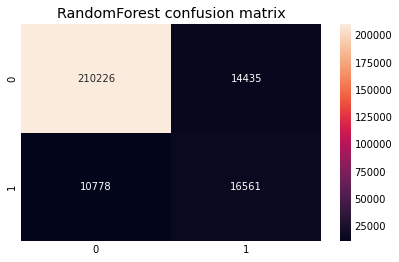

In [60]:
# import confusion Matrix
from sklearn.metrics import confusion_matrix
y_pred = cross_val_predict(RandomForestClassifier(random_state=4, n_estimators=50), X, Y, cv=10)
sns.heatmap(confusion_matrix(y_pred, Y), annot=True, fmt='2.0f').set(title="RandomForest confusion matrix")

In [61]:
(210226/252000) * 100, (14435/252000) * 100, (10778/252000) * 100, (16561/252000) * 100

(83.42301587301587, 5.728174603174603, 4.276984126984127, 6.571825396825397)

# Boosting Algorithms
# AdaBoost Classifiers

In [62]:
# import 
from sklearn.ensemble import AdaBoostClassifier

model = AdaBoostClassifier(random_state=15000)
model.fit(train_X, train_y)
prediction5 = model.predict(test_X)
accuracy1 = metrics.accuracy_score(prediction5, test_y)
result5 = cross_val_score(model, X, Y, scoring="accuracy")
accuracy1, result5.mean()

(0.8769973544973545, 0.877)

In [63]:
print(classification_report(test_y, prediction4))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93     66301
           1       0.52      0.58      0.54      9299

    accuracy                           0.88     75600
   macro avg       0.73      0.75      0.74     75600
weighted avg       0.89      0.88      0.88     75600



## XGboost

In [64]:
# import 
from xgboost import XGBClassifier

model = XGBClassifier(learning_rate=0.1, n_estimators=100, random_state=420)
model.fit(train_X, train_y)
y_pred = model.predict(test_X)
accuracy2 = metrics.accuracy_score(y_pred, test_y)
result6 = cross_val_score(model, X, Y, scoring="accuracy")
accuracy2, result6.mean()


(0.8785846560846561, 0.878702380952381)

In [65]:
print(classification_report(test_y, y_pred))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94     66301
           1       0.70      0.02      0.04      9299

    accuracy                           0.88     75600
   macro avg       0.79      0.51      0.49     75600
weighted avg       0.86      0.88      0.83     75600



In [66]:
classifiers = ["Logistic Regression", "KNN", "Random Forest", "Decision Tree", "AdaBoost", "XGBoost"]
prediction = [metrics.accuracy_score(prediction1, test_y), metrics.accuracy_score(prediction2, test_y), metrics.accuracy_score(prediction3, test_y), metrics.accuracy_score(prediction4, test_y), accuracy1, accuracy2]
result = [result1.mean(), result2.mean(), result3.mean(), result4.mean(), result5.mean(), result6.mean()]
a = pd.DataFrame(prediction, index=classifiers, columns=["Accuracy"])
b = pd.DataFrame(result, index=classifiers, columns=["Accuracy"])
pd.concat([a,b], axis=1)

,Accuracy,Accuracy
Logistic Regression,0.876997,0.877000
KNN,0.888730,0.887952
Random Forest,0.899206,0.899948
Decision Tree,0.881270,0.876425
AdaBoost,0.876997,0.877000
XGBoost,0.878585,0.878702


### Conclusion
RandomForest is the best suitable model for our dataset with accuracy 89%,  KNN and Adaboost XGboost Classifier can also consider, since they gives accuracy of 88%.

## Hypertuning Random Forest Classifier

In [67]:
#import 
from sklearn.model_selection import GridSearchCV

n_estimators = list(range(10,100,10))
hyper = {"n_estimators": n_estimators}
gd = GridSearchCV(estimator=RandomForestClassifier(random_state=4), param_grid=hyper, verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
0.9005436507936508
RandomForestClassifier(n_estimators=90, random_state=4)


SO, the best estimator seem to be 90.

In [68]:
# y_pred = cross_val_predict(RandomForestClassifier(random_state=4, n_estimators=90), X, Y, cv=10)
# sns.heatmap(confusion_matrix(y_pred, Y), annot=True, fmt='2.0f').set(title="RandomForest confusion matrix")

In [69]:
(210339/252000) * 100, 16525/252000 * 100

(83.46785714285714, 6.557539682539683)

the confusion matrix also shows __83.4+6.6=90%__ of correct prediction

## conclustion 
SO, by optimizing we can get 90% in our prediction

Thankyou for reading. And keep coding!